# SQLs

CREATE TABLE clientes (
    id_cliente SERIAL PRIMARY KEY,
    nombre_cliente VARCHAR(100)
);

CREATE TABLE menu (
    codigo_plato VARCHAR(10) PRIMARY KEY,
    nombre_plato VARCHAR(100),
    categoria VARCHAR(100),
    precio NUMERIC(8,2)
);

CREATE TABLE pedidos (
    id_pedido SERIAL PRIMARY KEY,
    codigo_plato VARCHAR(10) NOT NULL,
    id_cliente INTEGER NOT NULL,
    fecha_pedido TIMESTAMP NOT NULL,
    cantidad INTEGER NOT NULL,
    total NUMERIC(8,2) NOT NULL,
    FOREIGN KEY (codigo_plato) REFERENCES menu(codigo_plato),
    FOREIGN KEY (id_cliente) REFERENCES clientes(id_cliente)
);


# Librerías

In [ ]:
import random
import string
import psycopg2

# Variables

In [7]:
# Conexión a la base de datos PostgreSQL
def get_connect():
    conexion = psycopg2.connect(
        host="localhost",
        database="postgres",
        user="postgres",
        password="root1234",
        port="5433",
        options='-c client_encoding=UTF8'
    )
    return conexion

# Generar datos

In [3]:
# Función para generar un código de plato aleatorio
def generar_codigo_plato():
    letras = ''.join(random.choices(string.ascii_uppercase, k=3))
    numeros = ''.join(random.choices(string.digits, k=3))
    return letras + numeros

# Función para generar un nombre de plato aleatorio
def generar_nombre_plato():
    nombres = ["Pasta", "Pizza", "Tacos", "Sushi", "Hamburguesa", "Ensalada", "Sopa", "Pollo", "Carne", "Pescado"]
    return random.choice(nombres)

# Función para generar una categoría aleatoria
def generar_categoria():
    categorias = ["Italiana", "Mexicana", "Japonesa", "Americana", "Saludable", "Rápida"]
    return random.choice(categorias)

# Función para generar un precio aleatorio
def generar_precio():
    return round(random.uniform(5.00, 20.00), 2)

# Función para insertar platos en la tabla 'menu'
def insertar_platos(cantidad, conexion):
    cursor = conexion.cursor()

    for _ in range(cantidad):
        codigo_plato = generar_codigo_plato()
        nombre_plato = generar_nombre_plato()
        categoria = generar_categoria()
        precio = generar_precio()

        try:
            cursor.execute("""
                INSERT INTO menu (codigo_plato, nombre_plato, categoria, precio)
                VALUES (%s, %s, %s, %s)
            """, (codigo_plato, nombre_plato, categoria, precio))
            conexion.commit()
        except psycopg2.IntegrityError:
            conexion.rollback()
            print(f"El código de plato {codigo_plato} ya existe. Generando un nuevo código...")
    
    cursor.close()


cantidad = 100
conexion = get_connect()
try:
    insertar_platos(cantidad, conexion)
    print(f"{cantidad} platos generados e insertados correctamente.")
except Exception as error:
    print(error)
finally:
    conexion.close()

100 platos generados e insertados correctamente.


In [8]:
import random
import string
import psycopg2

# Función para generar un nombre de cliente aleatorio
def generar_nombre_cliente():
    nombres = ["Carlos", "María", "Juan", "Ana", "Luis", "Sofía", "Pedro", "Lucía", "Miguel", "Elena"]
    apellidos = ["García", "Martínez", "Rodríguez", "López", "Pérez", "Gómez", "Sánchez", "Díaz", "Fernández", "Ramírez"]
    return f"{random.choice(nombres)} {random.choice(apellidos)}"

# Función para insertar clientes en la tabla 'clientes'
def insertar_clientes(cantidad, conexion):
    cursor = conexion.cursor()

    for _ in range(cantidad):
        nombre_cliente = generar_nombre_cliente()

        try:
            cursor.execute("""
                INSERT INTO clientes (nombre_cliente)
                VALUES (%s)
            """, (nombre_cliente,))
            conexion.commit()
        except psycopg2.IntegrityError:
            conexion.rollback()
            print(f"El cliente {nombre_cliente} ya existe. Generando un nuevo nombre...")
    
    cursor.close()

# Función principal para ejecutar el script
cantidad_clientes = 50  # Número de clientes a generar
conexion = get_connect()
# Conexión a la base de datos PostgreSQL
try:
    insertar_clientes(cantidad_clientes, conexion)
    print(f"{cantidad_clientes} clientes generados e insertados correctamente.")

except Exception as error:
    print(error)
finally:
    conexion.close()

50 clientes generados e insertados correctamente.


In [10]:
import random
from datetime import datetime, timedelta
import psycopg2

def obtener_platos(conexion):
    cursor = conexion.cursor()
    cursor.execute("SELECT codigo_plato, precio FROM menu")
    platos = cursor.fetchall()
    cursor.close()
    return platos

def obtener_clientes(conexion):
    cursor = conexion.cursor()
    cursor.execute("SELECT id_cliente FROM clientes")
    clientes = cursor.fetchall()
    cursor.close()
    return [cliente[0] for cliente in clientes]

def generar_fecha_pedido():
    now = datetime.now()
    dias_atras = random.randint(0, 365)  # Generar una fecha en el último año
    return now - timedelta(days=dias_atras)

def insertar_pedidos(cantidad, conexion):
    platos = obtener_platos(conexion)
    clientes = obtener_clientes(conexion)

    cursor = conexion.cursor()

    for _ in range(cantidad):
        codigo_plato, precio_plato = random.choice(platos)
        id_cliente = random.choice(clientes)
        fecha_pedido = generar_fecha_pedido()
        cantidad = random.randint(1, 5)
        total = round(precio_plato * cantidad, 2)

        cursor.execute("""
            INSERT INTO pedidos (codigo_plato, id_cliente, fecha_pedido, cantidad, total)
            VALUES (%s, %s, %s, %s, %s)
        """, (codigo_plato, id_cliente, fecha_pedido, cantidad, total))

    conexion.commit()
    cursor.close()

cantidad = 500000

# Conexión a la base de datos PostgreSQL
conexion = get_connect()

try:
    insertar_pedidos(cantidad, conexion)
    print(f"{cantidad} pedidos generados e insertados correctamente.")
except Exception as error:
    print(error)
finally:
    conexion.close()


500000 pedidos generados e insertados correctamente.


# Exportar datos

COPY (SELECT * FROM pedidos)
TO 'C:\\Users\\usuario\\Downloads\\datos_historicos_pedidos.csv'
WITH (FORMAT CSV, HEADER TRUE, DELIMITER ',');

o También

In [11]:
import csv

# Conexión a la base de datos PostgreSQL
conexion = get_connect()

cursor = conexion.cursor()

# Ejecutar la consulta y guardar el resultado en un archivo CSV
cursor.execute("SELECT * FROM pedidos")
rows = cursor.fetchall()

with open("./data/datos_historicos_pedidos.csv", mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow([desc[0] for desc in cursor.description])  # Escribir encabezados
    writer.writerows(rows)

cursor.close()
conexion.close()

# ML Check

Mean Squared Error: 3.61574545553468e-26
R^2 Score: 1.0


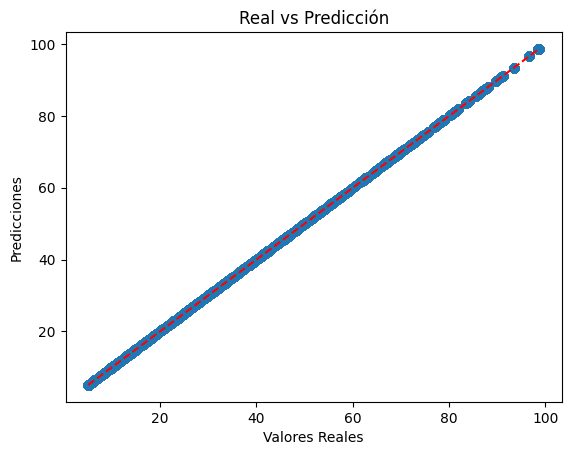

       fecha  prediccion_total
0 2025-01-31             28.77
1 2025-02-28             28.77
2 2025-03-31             28.77


C:\Users\usuario\AppData\Local\Temp\ipykernel_5992\134366212.py:48: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2025-01-01', end='2025-03-31', freq='M')
C:\Users\usuario\AppData\Local\Temp\ipykernel_5992\134366212.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_df[col] = 0
C:\Users\usuario\AppData\Local\Temp\ipykernel_5992\134366212.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_df[col] = 0
C:\Users\usuario\AppDa

In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV
df = pd.read_csv('./data/datos_historicos_pedidos.csv')

# Convertir la fecha de pedido a un número ordinal que represente los días desde una fecha inicial
df['fecha_pedido'] = pd.to_datetime(df['fecha_pedido'])
df['fecha_ordinal'] = df['fecha_pedido'].map(lambda date: date.toordinal())

# Codificar las variables categóricas (plato y cliente) utilizando one-hot encoding
df_encoded = pd.get_dummies(df, columns=['codigo_plato', 'id_cliente'], drop_first=True)

# Seleccionar características (features) y etiqueta (target)
X = df_encoded[['fecha_ordinal', 'cantidad'] + [col for col in df_encoded.columns if 'codigo_plato_' in col or 'id_cliente_' in col]]
y = df_encoded['total']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Random Forest
model = RandomForestRegressor(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Visualizar la comparación entre los valores reales y las predicciones
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Real vs Predicción')
plt.show()

# (Opcional) Predecir valores futuros
future_dates = pd.date_range(start='2025-01-01', end='2025-03-31', freq='M')
future_ordinal = np.array([date.toordinal() for date in future_dates]).reshape(-1, 1)

# Crear un DataFrame para futuras predicciones (usando cantidad promedio)
future_df = pd.DataFrame({
    'fecha_ordinal': future_ordinal.flatten(),
    'cantidad': np.mean(df['cantidad'])  # Usar la cantidad promedio
})

# Añadir las columnas de platos y clientes codificados, rellenando con 0 (asumiendo un nuevo cliente/plato)
for col in [col for col in df_encoded.columns if 'codigo_plato_' in col or 'id_cliente_' in col]:
    future_df[col] = 0

future_predictions = model.predict(future_df)

# Mostrar las predicciones futuras
proyeccion = pd.DataFrame({'fecha': future_dates, 'prediccion_total': future_predictions})
print(proyeccion)


In [ ]:
import pandas as pd
from datetime import datetime
import concurrent.futures
import time
import threading
 
class PrestamoManager:
    _instance = None
 
    @staticmethod
    def get_instance():
        if PrestamoManager._instance is None:
            PrestamoManager()
        return PrestamoManager._instance
 
    def __init__(self):
        if PrestamoManager._instance is not None:
            raise Exception("This class is a singleton!")
        else:
            PrestamoManager._instance = self
            self._df = pd.DataFrame()
            self._data_load_time = None
            self._data_lock = threading.Lock()
            self._load_data()
 
    def _load_data(self):
        start_time = time.time()
        try:
            # > 1
            future_df = executor.submit(self._read_csv)

            with concurrent.futures.ThreadPoolExecutor() as executor:
                # Cargar datos, limpiar datos y calcular estadísticas en hilos separados
                self._df = future_df.result()
                future_clean_data = executor.submit(self._clean_data)
                future_clean_data.result()
                future_calculate_stats = executor.submit(self._calculate_statistics)
                future_calculate_stats.result()
        except Exception as e:
            print(f"Error en la carga de datos concurrente: {e}")
        finally:
            end_time = time.time()
            self._data_load_time = end_time - start_time  # Guardar el tiempo total de carga de datos
            if self._df.empty:
                print("DataFrame vacío generado debido a un error en la lectura o procesamiento de los datos.")
 
    def _read_csv(self):
        try:
            return pd.read_csv("./data/prestamos_libros.csv")
        except Exception as e:
            print(f"Error al leer el archivo CSV: {e}")
            return pd.DataFrame()
 
    def _clean_data(self, inicio, fin):
        try:

            self._df.iloc[inicio:fin, :]['Fecha de préstamo'] = pd.to_datetime(self._df['Fecha de préstamo'])
            self._df.iloc[inicio:fin, :]['Fecha de devolución'] = pd.to_datetime(self._df['Fecha de devolución'])
        except Exception as e:
            print(f"Excepción controlada durante la limpieza de datos: {e}")
 
    def _calculate_statistics(self):
        try:
            self._df['Días de préstamo'] = (self._df['Fecha de devolución'] - self._df['Fecha de préstamo']).dt.days
        except Exception as e:
            print(f"Excepción controlada al calcular estadísticas: {e}")
 
    @property
    def dataframe(self):
        with self._data_lock:
            return self._df
 
    @property
    def data_load_time(self):
        return self._data_load_time
 
    def get_top_books(self, top_n=10):
        try:
            return self._df['Nombre del libro'].value_counts().head(top_n)
        except Exception as error:
            print(f"Excepción controlada al obtener los libros más prestados: {error}.")
            return pd.Series()
 
    def get_top_themes(self, top_n=5):
        try:
            return self._df['Temática del libro'].value_counts().head(top_n)
        except Exception as error:
            print(f"Excepción controlada al obtener las temáticas más populares: {error}.")
            return pd.Series()
 
    def promedio_dias_prestamo(self):
        try:
            return self._df['Días de préstamo'].mean()
        except Exception as error:
            print(f"Excepción controlada al obtener el promedio de días de préstamo: {error}.")
            return None
 
    def buscar_libro_y_calcular_estadisticas(self, nombre_del_libro):
        try:
            search_results = self.filter_by_book_name(nombre_del_libro)
            if not search_results.empty:
                registros = len(search_results)
                max_dias_prestamo = search_results['Días de préstamo'].max()
                promedio_dias_prestamo = search_results['Días de préstamo'].mean()
                return registros, max_dias_prestamo, promedio_dias_prestamo, search_results
            return None, None, None, None
        except Exception as error:
            print(f"Excepción controlada al buscar libro y calcular estadísticas: {error}.")
            return None, None, None, None
 
    def filter_by_book_name(self, nombre_del_libro):
        try:
            search_results = self._df[self._df['Nombre del libro'].str.contains(nombre_del_libro, case=False, na=False)]
            return search_results
        except Exception as error:
            print(f"Excepción controlada al filtrar por nombre del libro: {error}.")
            return pd.DataFrame()

In [ ]:
from flask import Flask, render_template, request
from models.prestamo import PrestamoManager
from concurrent.futures import ThreadPoolExecutor
import time
 
app = Flask(__name__)
 
# Obtener una instancia singleton del gestor de préstamos
prestamo_manager = PrestamoManager.get_instance()
 
# Crear un ejecutor de hilos para la carga de datos
executor = ThreadPoolExecutor(max_workers=1)  # Solo necesitamos un hilo para la carga de datos
 
@app.route('/', methods=['GET', 'POST'])
def index():
    # Obtener los parámetros de búsqueda del libro y el número de libros/temáticas más solicitados
    nombre_del_libro = request.args.get('nombre_del_libro', '').strip()
    try:
        top_n_books = int(request.args.get('top_n_books', '10'))
    except ValueError:
        top_n_books = 10  # Valor predeterminado en caso de error
 
    try:
        top_n_themes = int(request.args.get('top_n_themes', '5'))
    except ValueError:
        top_n_themes = 5  # Valor predeterminado en caso de error
 
    # Inicializar variables para los resultados de búsqueda y tiempos de carga
    registros, max_dias_prestamo, promedio_dias_prestamo, search_results = (None, None, None, None)
    data_load_time = None
    search_time = None
 
    if nombre_del_libro:
        # Medir el tiempo de carga de datos usando concurrencia
        future = executor.submit(load_data)
        start_time = time.time()
       
        try:
            future.result()  # Esperar a que la carga de datos termine
            data_load_time = time.time() - start_time  # Calcular el tiempo de carga de datos
        except Exception as e:
            data_load_time = 'Error en la carga de datos'
            print(f"Excepción controlada durante la carga de datos: {e}")
 
        # Medir el tiempo de búsqueda del libro
        start_search_time = time.time()
        try:
            # Buscar libro y calcular estadísticas
            registros, max_dias_prestamo, promedio_dias_prestamo, search_results = prestamo_manager.buscar_libro_y_calcular_estadisticas(nombre_del_libro)
            search_time = time.time() - start_search_time  # Calcular el tiempo de búsqueda
        except Exception as e:
            search_time = 'Error en la búsqueda'
            print(f"Excepción controlada al buscar libro y calcular estadísticas: {e}")
 
    try:
        # Obtener los libros más solicitados y las temáticas más solicitadas
        top_books = prestamo_manager.get_top_books(top_n=top_n_books)
        top_themes = prestamo_manager.get_top_themes(top_n=top_n_themes)
    except Exception as e:
        print(f"Excepción controlada al obtener libros y temáticas: {e}")
        top_books = top_themes = None
 
    # Renderizar la plantilla con los resultados y tiempos de carga
    return render_template(
        "index.html",
        registros=registros,
        max_dias_prestamo=max_dias_prestamo,
        promedio_dias_prestamo=promedio_dias_prestamo,
        search_results=search_results,
        top_books=top_books,
        top_themes=top_themes,
        total_registros=len(prestamo_manager.dataframe),
        mean_dias_prestamo=prestamo_manager.promedio_dias_prestamo(),
        data_load_time=data_load_time,
        search_time=search_time,
        top_n_books=top_n_books,
        top_n_themes=top_n_themes
    )
 
@app.route("/historial")
def show_table():
    # Mostrar el historial completo de préstamos
    return render_template(
        "historial.html", table=prestamo_manager.dataframe.to_html(index=False)
    )
 
def load_data():
    try:
        # Cargar los datos en el DataFrame
        prestamo_manager._load_data()
    except Exception as e:
        print(f"Excepción controlada en la carga de datos: {e}")
 
if __name__ == "__main__":
    app.run(debug=True)

# END